In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from a6_utils import *

# Exercise 3

### a

In [61]:

def calculateDataMatrix(path):
    files = os.listdir(path)
    # histograms = {}
    dataMatrix = np.array([])
    for f in files:
        temp = cv2.imread(f'{path}/{f}') # 0-255
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY) / 255.0
        origShape = temp.shape
        temp = temp.reshape(-1)
        if dataMatrix.size == 0:
            dataMatrix = temp
        else:
            dataMatrix = np.vstack((dataMatrix, temp))
            
    return dataMatrix.T, origShape

data, origShape = calculateDataMatrix("data/faces/1")

In [62]:
def dualPCA(data):
    n = len(data[0])
    mi = 1/n * np.cumsum(data, 1)[:, -1]
    Xd = np.zeros(data.shape)
    for i in range(n):
        Xd[:,i] = data[:, i] - mi
    C = 1/(n-1) * np.matmul(Xd.T, Xd)
    U, D, VT = np.linalg.svd(C)
    D[D < 10**(-10)] = 0
    newD = 1 / ((np.eye(D.shape[0], D.shape[0]) * D) * (n-1) + 10**(-20))
    newD[newD == 10**20] = 0
    U = np.matmul(Xd, np.matmul(U, newD))
    
    for i in range(n):
        if np.sqrt(np.sum(U[:,i]* U[:,i])) == 0:
            continue
        U[:,i] /=  np.sqrt(np.sum(U[:,i]* U[:,i]))
        
    return U, mi

eigenVectors, mi = dualPCA(data)

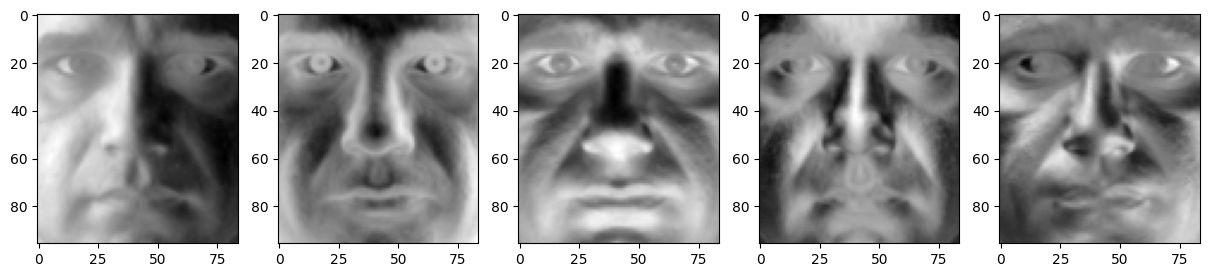

In [63]:
f = plt.figure(figsize=(15, 10))

for i in range(5):
    f.add_subplot(1, 5, i+1)
    plt.imshow(np.reshape(eigenVectors[:, i], origShape), cmap='gray')
 
plt.show()

What do the resulting images represent (both
numerically and in the context of faces)?

They are the eigen vectors of the covariance matrix of picture data with the biggest eigen values. The variance in the data is biggest in these eigen vector directions (these are the vectors that describe the pictures the most)

In [68]:
pcaData = np.matmul(eigenVectors.T, data[:, 0] - mi)
projectedData = np.matmul(eigenVectors, pcaData) + mi
print(np.sum((data[:, 0] - projectedData) * (data[:, 0] - projectedData)))

[ 0.04185049  0.04270833  0.04411765 ... -0.11783088 -0.07843137
 -0.06672794]
6.568916216155945e-25


Is the result the same? 

Yes, if we ignore numerical errors.

3765


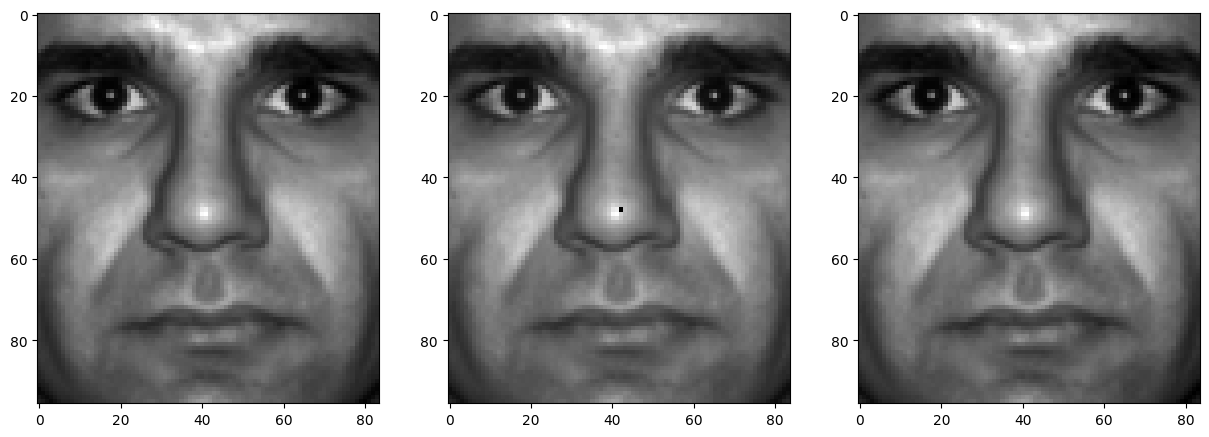

In [110]:
eigenVectorsSmaller = np.copy(eigenVectors)
eigenVectorsSmaller[:, 0] = np.zeros(len(eigenVectors))
# eigenVectorsSmaller[:, :] = np.zeros(eigenVectors.shape)
pcaData = np.matmul(eigenVectorsSmaller.T, data[:, 0] - mi)
projectedData = np.matmul(eigenVectorsSmaller, pcaData) + mi
diff = projectedData - data[:, 0]
print(len(diff[diff > 10**(-10)]))

temp = np.copy(data[:, 0])
temp[4074] = 0
f = plt.figure(figsize=(15, 10))

f.add_subplot(1, 3, 1)
plt.imshow(np.reshape(data[:, 0], origShape), cmap='gray')
f.add_subplot(1, 3, 2)
plt.imshow(np.reshape(temp, origShape), cmap='gray')
f.add_subplot(1, 3, 3)
plt.imshow(np.reshape(projectedData, origShape), cmap='gray')
 
plt.show()

When you change 4074 dimension in input to zero => one pixel is changed to 0 (black). When you don't use one eigenvector in pca space you can't reconstract the whole vector space many pixels are changed in the second example.

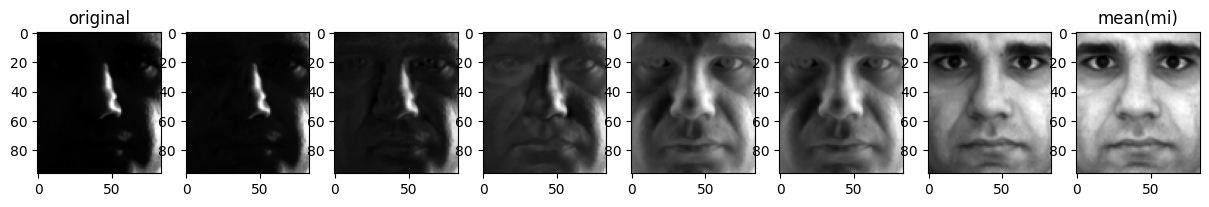

In [161]:
# chosen = 29
chosen = 60

temp = np.copy(data[:, chosen])
eigenVectorsSmaller = np.copy(eigenVectors)
eigenVectorsSmaller[:, 32:-1] = np.zeros((len(eigenVectors), len(eigenVectors[0]) - 33))
pcaData = np.matmul(eigenVectorsSmaller.T, temp - mi)
projectedData = np.matmul(eigenVectorsSmaller, pcaData) + mi

temp = np.copy(data[:, chosen])
eigenVectorsSmaller[:, 16:-1] = np.zeros((len(eigenVectors), len(eigenVectors[0]) - 17))
pcaData = np.matmul(eigenVectorsSmaller.T, temp - mi)
projectedData2 = np.matmul(eigenVectorsSmaller, pcaData) + mi


temp = np.copy(data[:, chosen])
eigenVectorsSmaller[:, 8:-1] = np.zeros((len(eigenVectors), len(eigenVectors[0]) - 9))
pcaData = np.matmul(eigenVectorsSmaller.T, temp - mi)
projectedData3 = np.matmul(eigenVectorsSmaller, pcaData) + mi


temp = np.copy(data[:, chosen])
eigenVectorsSmaller[:, 4:-1] = np.zeros((len(eigenVectors), len(eigenVectors[0]) - 5))
pcaData = np.matmul(eigenVectorsSmaller.T, temp - mi)
projectedData4 = np.matmul(eigenVectorsSmaller, pcaData) + mi

temp = np.copy(data[:, chosen])
eigenVectorsSmaller[:, 2:-1] = np.zeros((len(eigenVectors), len(eigenVectors[0]) - 3))
pcaData = np.matmul(eigenVectorsSmaller.T, temp - mi)
projectedData5 = np.matmul(eigenVectorsSmaller, pcaData) + mi

temp = np.copy(data[:, chosen])
eigenVectorsSmaller[:, 1:-1] = np.zeros((len(eigenVectors), len(eigenVectors[0]) - 2))
pcaData = np.matmul(eigenVectorsSmaller.T, temp - mi)
projectedData6 = np.matmul(eigenVectorsSmaller, pcaData) + mi

f = plt.figure(figsize=(15, 10))

f.add_subplot(1, 8, 1)
plt.imshow(np.reshape(data[:, chosen], origShape), cmap='gray')
plt.title("original")
f.add_subplot(1, 8, 2)
plt.imshow(np.reshape(projectedData, origShape), cmap='gray')
f.add_subplot(1, 8, 3)
plt.imshow(np.reshape(projectedData2, origShape), cmap='gray')
f.add_subplot(1, 8, 4)
plt.imshow(np.reshape(projectedData3, origShape), cmap='gray')
f.add_subplot(1, 8, 5)
plt.imshow(np.reshape(projectedData4, origShape), cmap='gray')
f.add_subplot(1, 8, 6)
plt.imshow(np.reshape(projectedData5, origShape), cmap='gray')
f.add_subplot(1, 8, 7)
plt.imshow(np.reshape(projectedData6, origShape), cmap='gray')
f.add_subplot(1, 8, 8)
plt.title("mean(mi)")
plt.imshow(np.reshape(mi, origShape), cmap='gray')
 
plt.show()

Pictures are getting closer to the mean (mi)